# <h1 style='color: darkblue; font-size: 30px;'>Data Science - Insurance Charge Regression Prediction</h1>

<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 10;'>The project</font>

### <font color='darkblue' style='font-size: 20;'>Description:</font>
The main goal of the project is to use linear regression algorithm to predict charges of a Health Insurance.

https://www.kaggle.com/datasets/shivadumnawar/health-insurance-dataset

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>About the dataset</font>

### <font color='darkblue' style='font-size: 20;'>Data</font>

The dataset consists of 1338 data points stored as rows with 7 columns

* **age:** age of the customer.
* **sex** sex of the customer
* **bmi:** body mass index of the individual
* **children:** number of children he/she has
* **smoker:** is that individual a frequent Smoker or not.
* **region:** which region/part he/she lives in
* **charges:** the target/independent feature

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>Preparation</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Importing the required libraries</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### <font color='darkblue' style='font-size: 20;'>Reading the dataset</font>

In [29]:
df = pd.read_csv('..\\Projeto3_Insurance\\insurance.csv', sep = ',')

### <font color='darkblue' style='font-size: 20;'>Visualizating the dataset</font> 

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


### <font color='darkblue' style='font-size: 20;'>Verifying the size of the dataset</font> 

In [31]:
df.shape

(1338, 7)

### <font color='darkblue' style='font-size: 20;'>Analyzing descriptive statistics</font> 

In [32]:
df.describe()

,age,bmi,children,charges
count,1334.000000,1336.000000,1338.000000,1338.000000
mean,39.206147,30.663866,1.094918,13270.422265
std,14.070989,6.102741,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,26.250000,26.272500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### <font color='darkblue' style='font-size: 20;'>Checking if that there are no non-null values in the data</font> 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1334 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [34]:
df.isnull().sum()

age         4
sex         0
bmi         2
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
df.isna().sum()

age         4
sex         0
bmi         2
children    0
smoker      0
region      0
charges     0
dtype: int64

The columns "age" and "bmi" have null values, but they are few. These values will be replaced by the average.

### <font color='darkblue' style='font-size: 20;'>Replace null values</font> 

In [36]:
#calculation of the average age and bmi
average_age = int(df['age'].mean())
average_bmi = round(df['bmi'].mean(),3)

In [37]:
#Replace the null values by the average in the "age" and "bmi" columns
df.update(df['age'].fillna(average_age))
df.update(df['bmi'].fillna(average_bmi))

In [38]:
#Verify if the operations worked
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### <font color='darkblue' style='font-size: 20;'>Modification of the "smoker" and "sex" columns</font> 

In [39]:
#Change smoker column
smoker_map = {'yes': 1, 'no': 0}

#Apply the mapping to the dataset
df['smoker'] = df['smoker'].map(smoker_map)

#Check the dataset
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,1,southwest,16884.92400
1,18.0,male,33.770,1,0,southeast,1725.55230
2,28.0,male,33.000,3,0,southeast,4449.46200
3,33.0,male,22.705,0,0,northwest,21984.47061
4,32.0,male,28.880,0,0,northwest,3866.85520


# <font color='darkblue' style='font-size: 20;'>Processing</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Exploratory Data Analysis</font> 

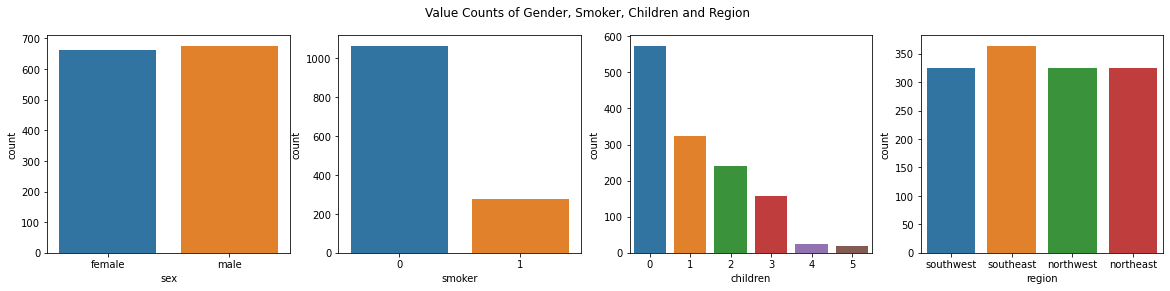

In [40]:
#General Analyses
fig, ax2 = plt.subplots(1,4,  figsize=(20,4))
fig.suptitle('Value Counts of Gender, Smoker, Children and Region')
sns.countplot(ax=ax2[0], x=df.sex)
sns.countplot(ax=ax2[1], x=df.smoker)
sns.countplot(ax=ax2[2], x=df.children)
sns.countplot(ax=ax2[3], x=df.region)
plt.show()

**Conclusions:**

* There are slightly more males than females
* There are more non-smokers
* There are more childless people
* There are more people from the 'southeast' region

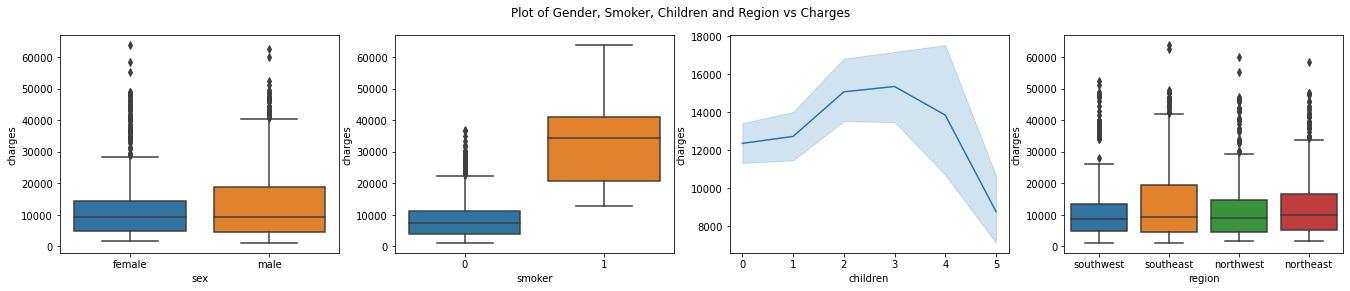

In [19]:
#Analyses in relation to costs
fig, ax2 = plt.subplots(1,4,  figsize=(23,4))
fig.suptitle('Plot of Gender, Smoker, Children and Region vs Charges',)
sns.boxplot(ax=ax2[0], x=df.sex, y=df.charges)
sns.boxplot(ax=ax2[1], x=df.smoker, y=df.charges)
sns.lineplot(ax=ax2[2], x=df.children, y=df.charges)
sns.boxplot(ax=ax2[3], x=df.region, y=df.charges)
plt.show()

**Conclusions:**
* There is a higher charge for males
* As expected, the charge for smokers is higher
* Charges for people who have 2 and 3 children are higher
* The 'southeast' region has higher charges

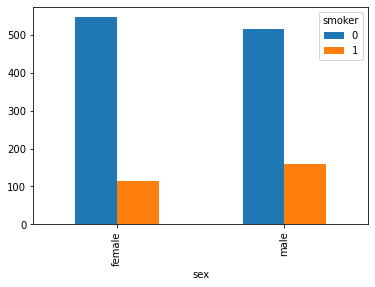

In [20]:
#Analysis of the amount of smokers by gender
pd.crosstab(df.sex, df.smoker).plot(kind="bar")
plt.show()

**Conclusions:**
* The number of male smokers is higher

### <font color='darkblue' style='font-size: 20;'>Correlation Matrix</font> 

In [21]:
df.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109224,0.042433,-0.024965,0.299068
bmi,0.109224,1.000000,0.012881,0.003711,0.198323
children,0.042433,0.012881,1.000000,0.007673,0.067998
smoker,-0.024965,0.003711,0.007673,1.000000,0.787251
charges,0.299068,0.198323,0.067998,0.787251,1.000000


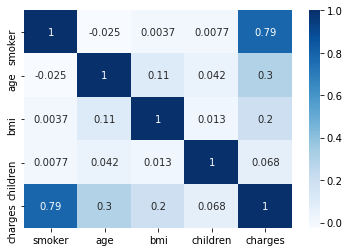

In [23]:
sns.heatmap(df[['smoker','age', 'bmi', 'children', 'charges']].corr(), cmap='Blues', annot=True)
plt.show()

**Conclusions:**
* The highest correlation in the dataset for 'charges' is 'smoker', followed by 'age' and 'bmi'.

# <font color='darkblue' style='font-size: 20;'>Building the model</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Linear Regression</font> 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import RobustScaler, StandardScaler

#### <font color='darkblue' style='font-size: 20;'>Replace the values of the 'sex' column, where 0: male and 1: female</font> 

In [41]:
#Change sex column
sex_map = {'female': 1, 'male': 0}

#Apply the mapping to the dataset
df['sex'] = df['sex'].map(sex_map)

#Check the dataset
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19.0,1,27.900,0,1,southwest,16884.92400
1,18.0,0,33.770,1,0,southeast,1725.55230
2,28.0,0,33.000,3,0,southeast,4449.46200
3,33.0,0,22.705,0,0,northwest,21984.47061
4,32.0,0,28.880,0,0,northwest,3866.85520


In [42]:
#Setting the value for dependent and independent variables
features = ['age', 'sex', 'bmi', 'children', 'smoker']
target = ['charges']

x = df[features].values
y = df[target].values

In [43]:
#Splitting the dataset
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=SEED)

In [44]:
#Creating the Logistic Regression model
lr = LinearRegression()

#Fitting the Logistic Regression model
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
#Prediction of test set
y_pred = lr.predict(X_test)

(0.7681214799764344, 4170.924582544893, 5830.8685042598545)

In [60]:
#Metrics
print("MAE:", round(mean_absolute_error(y_test, y_pred),4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
print("R2 Score:",round(r2_score(y_test, y_pred),4))

MAE: 4170.9246
RMSE: 5830.8685
R2 Score: 0.7681


In [61]:
#Comparison between the actual values and the values estimated by the model
df_predict = pd.DataFrame((zip(y_test, y_pred)), columns = ['Actual', 'Predicted'])
df_predict.head()

,Actual,Predicted
0,[9095.06825],[8504.727392813398]
1,[5272.1758],[6897.903777777792]
2,[29330.98315],[36805.557111416536]
3,[9301.89355],[9526.321994797047]
4,[33750.2918],[26833.93346330358]
